### Iris flower classification using RandomForestClassifier

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset

d=pd.read_csv("iris.csv")

In [3]:
# To display first five rows

d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To display last five rows

d.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# To check if there are any duplicates in the dataset.

d.duplicated().sum()

0

In [6]:
# To display the columns

d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Dropping column id since it is not useful in machine learning.

d= d.drop(["Id"], axis = 1)

In [8]:
# To display number of samples on each class

d['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
# To display basic information

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# To display statistical insights of data

d.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Check for null values

d.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The Iris dataset contains 150 observations of iris flowers, with 50 observations for each of the three species (setosa, versicolor, and virginica). Each observation has four features or variables: sepal length, sepal width, petal length, and petal width. These features are all numeric and continuous. The dataset contains no missing or null values.

Detailed description of the columns: Sepal length (in cm): The length of the sepal (the outermost part of the flower that protects the inner petals and reproductive organs). Sepal width (in cm): The width of the sepal. Petal length (in cm): The length of the petal (the brightly colored part of the flower that attracts pollinators). Petal width (in cm): The width of the petal.

In [12]:
# Getting correlation matrix

d.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


SepalLengthCm


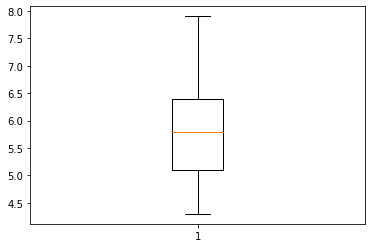

SepalWidthCm


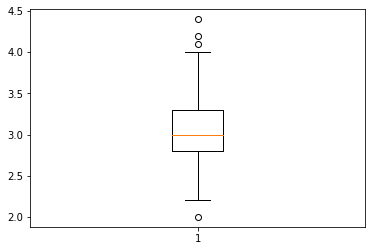

PetalLengthCm


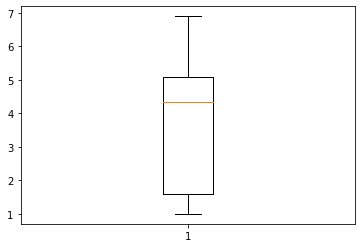

PetalWidthCm


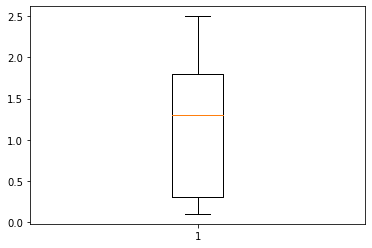

In [13]:
# Finding outliers using boxplot

col=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

In [14]:
# SepalWidthCm contains some outliers.
# We can remove the outlier using interquartile range.

SepalLengthCm


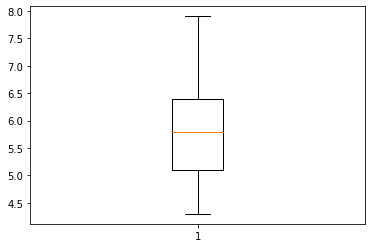

SepalWidthCm


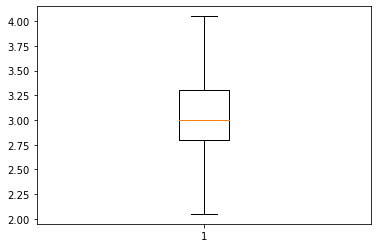

PetalLengthCm


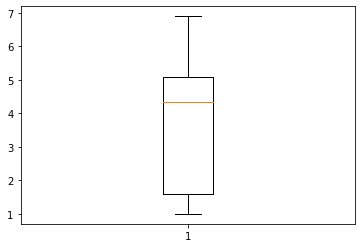

PetalWidthCm


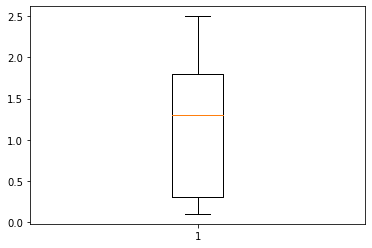

In [15]:
# Romoving outliers

for i in col:
    q1=np.percentile(d[i],25,interpolation='midpoint')
    q2=np.percentile(d[i],50,interpolation='midpoint')
    q3=np.percentile(d[i],75,interpolation='midpoint')
    iqr=q3-q1
    low=q1-1.5*iqr
    up=q3+1.5*iqr
    for j in d[i]:
        if j<low:
            d[i]=d[i].replace(j,low)
        elif j>up:
            d[i]=d[i].replace(j,up)
            
# Checking for outliers again

for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

In [16]:
# As you can see, the outliers has been removed.

In [17]:
# Splitting the data into x and y. ie, independant variables and target column.

y=d["Species"]
x=d.drop(["Species"],axis=1)

In [18]:
# Traing the model with RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=RandomForestClassifier()

model.fit(x_train,y_train)
model_train=model.predict(x_train)
model_test=model.predict(x_test)

In [19]:
# Now the model can make prediction
pred = model.predict(x)
scores = pd.DataFrame({'Actual':y,'Predictions':pred})

In [20]:
# We can compare the Actual and predictions using table given below
scores.head()

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


In [22]:
print('Accuracy Score :',accuracy_score(y_test, model_test))
print('Classification Report :\n',classification_report(y_test,model_test))
print('Confusion Matrix :\n',confusion_matrix(y_test, model_test))

Accuracy Score : 0.9111111111111111
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.88      0.88      0.88        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.91      0.91      0.91        45

Confusion Matrix :
 [[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


The model score is 0.91. The model is 91% accurate. So the model can make classifications well.